# Classical Statistical Inference 

## Table of Content:

- I. [Basic probability concepts](#I)    
    * I.1 [Probability Axioms](Basic-statistics_01_Expanded.ipynb)
    * I.2 [What is a random variable ?](#I.2-What-is-a-random-variable-?)
    * I.3 [What is a conditional probability $p(A|B)p(A | B)$ and Bayes theorem ?](#I.3-What-is-a-conditional-probability-$p(A-|-B)$-and-Bayes-theorem?)
    * I.4 [Probability density function (PDF) and Cumulative Distribution Function (CDF)](#pdf)
        * I.4a [Common probability distributions](#I.4a-Common-Probability-distributions)
        * I.4b [Bivariate PDF](#bivariate)
        * I.4c [Multivariate Normal distribution](#I.4c-Multivariate-normal-distribution) 

- To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    
- To do an interactive tour of the characteristics and properties of **common distributions** encountered in science, you can run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

- X. [References and supplementary material](#X)

In [2]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

## 0. Why some statistics ? 

Short-answer: Because randomness is there as soon as there are observational measurements (in all science fields, not only in astrophysics). 

With this lecture, we aim to give you tools to manipulate data (from observations or from simulations). Data, even when being the outcome of some deterministic process, contain a stochastic component, for example due to the observational device. This means that in essence, data are what statisticians call a **random variable**. This is why, when you report measurements you also need to report some uncertainties. These uncertainty calculation look often to student like some kind of black magic. This also means that they are sometimes not adequately used or reported. We'll clarify in the coming lectures, how to make those calculations using python tools. 

This is a necessary step to enter into the field of machine learning. If you look on Wikipedia at the page dedicated to [Machine learning](https://en.wikipedia.org/wiki/Machine_learning), you'll find the following definition: "Machine learning is the study of computer algorithms that improve automatically through experience. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so." This is not the result of black magic, but of well understood statistics and probability. 

In summary, data in science often contain randomness due to measurement errors or intrinsic variability. Understanding randomness is key to:

- Quantifying uncertainty
- Making predictions
- Building models (e.g., in machine learning)

## I Basic Probability Concepts and Notations:  <a class="anchor" id="I"></a>

This section aims at reminding us some definitions and notations, so everybody is on the same page. Illustration with python will also be provided. 

In probability theory, we define the following:
- **Sample space ($\Omega$)**: Set of all possible outcomes of an experiment. 
- **Realisations ($\omega$)**: Points in $\Omega$. Each of your *data point* is a realisation, but there may exist other realisations that are not in your data. 
- **Event (A)** A subset of $\Omega$ (i.e. a subsample of the $\omega$). In other words your *data set* is an event.  
- **Probability of an event A**: $p(A)$.
- **Random Variable (X)**: A variable whose value is subject to randomness.

> The *frequentist (classical) interpretation of statistics*: You make a measurement, you repeat it an infinite number of times, and build an histogram. This histogram gives the *relative frequency* of getting a measurement compared to another. This relative frequency is what we call a probability. The whole possible outcomes of an experiment is called sample space $\Omega$. An event is a subsample of $\omega$ / is an ensemble of realisations (your data set).

**Example**: We measure the magnitude $m$ of a variable star. Then $\Omega = {\rm I\!R}$ (or some plausible range such as $]-30, 40 [ $, but this makes little difference in practice and $\Omega$ can in general be larger than needed). $\omega$ is a value in $\Omega$. While an event is the ensemble of magnitude measurements  that are e.g. such that $m_i > 15$ and $m_i <=15.5$, hence this *event* is A = ]15, 15.5]. Note that an event *can* also be a single point (i.e. A = [17.]). 

If you need some refresh on basic probability concepts, move to the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook. 

### I.1 Probability axioms

Check the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook to refresh your mind about the axioms behind the probability theory. 

### I.2 What is a random variable and how to generate them in Python?

Definition (informal): 

> A random variable is a variable whose value results from the measurement of a quantity that is subject to random variations. 

**Example:** 

**Discrete Random Variable**: You roll a dice. You can then define $X(\omega)$ be the *number of times you draw an even number* in a sequence $\omega$. Imagine you have rolled your dice 10 times, and get  $\omega = {1, {\bf 2, 4, 2}, 5, {\bf 4, 6}, 3, 3, 1 }$. Then $X(\omega) = 5$ is the value taken by your *random variable* X.    

**Continuous Random Variable**: You measure the velocity of a star by means of its apparent motion on the sky. The apparent motion (in arcsec), but also the infered velocity (that involves feeding in the distance to the star) will take continuous values. 

**Warning**, a random variable is *NOT* like typical mathematical variables as it can take *different values* (each with an associated probability). In litterature, you will generaly find random variables written with *CAPITAL* letters, and their particular *realization* with *lowercase*. A realisation of a random variable is also called "random variate". 

**Random variable with numpy**

In numpy there is a sub-module called random that contains many functions that involve random selection. In particular there is a function `choice` that allows you to make a choice at random. It picks one item at random from an array, and it is equally likely to pick any of the items. The function call is `np.random.choice(array_name)`, where `array_name` is the name of the array from which to make the choice.

In [2]:
# Let's build a small array with classification of objects on an image: 
class_phot = np.array(['star', 'galaxy', 'galaxy', 'star', 'star'])
np.random.choice(class_phot)

'star'

If you re-rerun the above cell multiple times, you will see that the output changes, because the output is taken at random. If you provide a second argument (`size = n`), it will repeat the process $n$ number of times. In practice, this `method` allows you to *generate a random sample* from a 1-D array. You can add a third argument that specifies if you allow replacements or not as the output: i.e. `replace=False` means that the value stored at a given index of the array will only appear once in the output. 

In [3]:
np.random.choice(class_phot, size=3)    

array(['star', 'galaxy', 'star'], dtype='<U6')

In [4]:
# Use e.g. np.arange(5) and size=5 to compare the behaviour with replace=True / replace = False
an_array_of_float = np.arange(5)
np.random.choice(an_array_of_float, size=5, replace=True)

array([2, 4, 4, 0, 3])

In [5]:
np.random.choice(an_array_of_float, size=5, replace=False)

array([2, 0, 1, 3, 4])

In [6]:
#Try out with an array size > size of the random sample 
np.random.choice(an_array_of_float, size=6, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [7]:
np.random.choice(an_array_of_float, size=6, replace=True)

array([4, 2, 0, 4, 3, 4])

In [8]:
# If size > size(a), you cannot generate a random sample with choice and replace=False (it does not make sense)

Other important methods of `np.random` are:
- `np.random.seed(value)`: Set the seed of the random number generator (allows to get reproductible results)
- `np.random.RandomState(seed = value)`: Better way to fix the seed -in particular in case of parallelization: see https://stackoverflow.com/questions/16016959/scipy-stats-seed) 
- `np.random.rand(shape)`: generate an array populated with random floats drawn from an uniform distribution. 
- `np.random.randint(low, high, shape)`: generate an array of random integers between `low` and `high` values. 
- `np.random.permutation(array_name)`: return a copy of the original array with elements permuted along the first axis of the array.

**Note:**
Depending of your problem, you may want to dig more into the the specificities of the available random number generators. For instance, the default generator with numpy 1.2 is Mersenne-Twister generator. PCG random number generators are apparently better ([https://www.pcg-random.org/](https://www.pcg-random.org/)) and can also be used to generate random numbers in numpy. Look at numpy documentation for more informations and links therein. Here is an expample of how to call such a Random number generator.
``` python
from numpy.random import Generator, PCG64
rng = Generator(PCG64())
rng.rand(a_shape)
```


#### Exercise: Coin toss

Create a 2D array of 10 rows and 7 columns (with random integer values). 
- (1) Use `choice` to select at random 5 different rows. 
- (2) Use `choice` to select at random 3 different columns.
- (3) Create an 1-D array representing result of 1000 coin tosses (set value `0` for head and `1` for tail using random integers generator). Plot the histogram of their values (using `matplotlib.pyplot.hist`; Note that you can set the number of bins $N$ by setting the argument `bins = N`). Set the argument `density` of `hist()` to values True and False. What is the difference of behaviour ? 
- (4) Fix the seed of your random generator. Create an array `a` of 10 integers between 0 and 10. Redo this operation and save it into an array `b`. Compare `a` and `b`. How should you proceed to have 2 identical arrays ? 

In [9]:
# Create a 2D array 
my_2d_array = np.random.randint(0, 71, size=70).reshape((10,7))
my_2d_array 

array([[64, 11, 55, 28, 61, 12, 41],
       [ 5, 27, 63,  7, 43, 70,  0],
       [43, 41,  0, 42, 31,  1, 67],
       [17, 52,  8, 42, 25,  9, 46],
       [ 3, 54, 31,  0, 62, 27, 56],
       [70, 25, 49, 48, 42, 32, 65],
       [67, 51, 13, 20, 54, 28, 25],
       [14, 59, 55, 69, 33, 34, 40],
       [32, 30, 19, 42, 10, 59, 21],
       [ 3, 15, 10,  0, 12, 21, 16]])

In [10]:
# But you can also use the shape directly as an argument to create your array 
my_2d_array = np.random.randint(0, 71, size=(10, 7))
my_2d_array

array([[39, 59, 28, 53, 63, 52,  6],
       [59,  3, 40, 47, 32,  4, 39],
       [17, 68, 46, 31, 66, 22, 22],
       [46, 59, 19, 29, 40, 51, 69],
       [54, 48, 68,  6, 22, 16, 26],
       [44, 64, 14, 56, 39,  9, 60],
       [ 1,  3, 52, 62, 33, 32, 25],
       [62,  9, 41,  3, 63, 64, 26],
       [36, 62, 30, 68,  7, 35, 35],
       [28,  6, 43,  7, 43,  8, 26]])

In [61]:
# Select at random 5 different rows
row_indices = np.arange(0, my_2d_array.shape[0])
# Less general: row_indices = np.arange(0, 10)
rnd_rows_ids = np.random.choice(row_indices, size=5, replace = False)
print('My random row ids are ', rnd_rows_ids)
print('My original array \n', my_2d_array)
print('My sub-array \n', my_2d_array[rnd_rows_ids, :])

My random row ids are  [3 7 4 6 8]
My original array 
 [[39 59 28 53 63 52  6]
 [59  3 40 47 32  4 39]
 [17 68 46 31 66 22 22]
 [46 59 19 29 40 51 69]
 [54 48 68  6 22 16 26]
 [44 64 14 56 39  9 60]
 [ 1  3 52 62 33 32 25]
 [62  9 41  3 63 64 26]
 [36 62 30 68  7 35 35]
 [28  6 43  7 43  8 26]]
My sub-array 
 [[46 59 19 29 40 51 69]
 [62  9 41  3 63 64 26]
 [54 48 68  6 22 16 26]
 [ 1  3 52 62 33 32 25]
 [36 62 30 68  7 35 35]]


In [12]:
# Permutations of the rows of the original array 
np.random.permutation(my_2d_array)

array([[39, 59, 28, 53, 63, 52,  6],
       [17, 68, 46, 31, 66, 22, 22],
       [54, 48, 68,  6, 22, 16, 26],
       [59,  3, 40, 47, 32,  4, 39],
       [28,  6, 43,  7, 43,  8, 26],
       [44, 64, 14, 56, 39,  9, 60],
       [62,  9, 41,  3, 63, 64, 26],
       [46, 59, 19, 29, 40, 51, 69],
       [36, 62, 30, 68,  7, 35, 35],
       [ 1,  3, 52, 62, 33, 32, 25]])

In [13]:
# Select 3 columns ids
# Select 3 columns ids
col_indices = np.arange(0, my_2d_array.shape[1])
rnd_col_ids = np.random.choice(col_indices, size=3, replace = False)
print('My random row ids are ', rnd_col_ids)
print('My original array \n', my_2d_array)
print('My sub-array \n', my_2d_array[:, rnd_col_ids])

My random row ids are  [2 3 4]
My original array 
 [[39 59 28 53 63 52  6]
 [59  3 40 47 32  4 39]
 [17 68 46 31 66 22 22]
 [46 59 19 29 40 51 69]
 [54 48 68  6 22 16 26]
 [44 64 14 56 39  9 60]
 [ 1  3 52 62 33 32 25]
 [62  9 41  3 63 64 26]
 [36 62 30 68  7 35 35]
 [28  6 43  7 43  8 26]]
My sub-array 
 [[28 53 63]
 [40 47 32]
 [46 31 66]
 [19 29 40]
 [68  6 22]
 [14 56 39]
 [52 62 33]
 [41  3 63]
 [30 68  7]
 [43  7 43]]


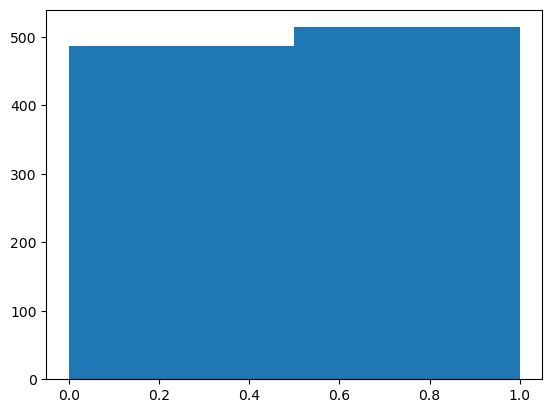

In [14]:
# (3) 1D array representing 1000 coin toss and histogram. 
coin_tosses = np.random.randint(0, 2, size=1000)
hist_vals = plt.hist(coin_tosses, bins=2) 

In [15]:
hist_vals

(array([486., 514.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

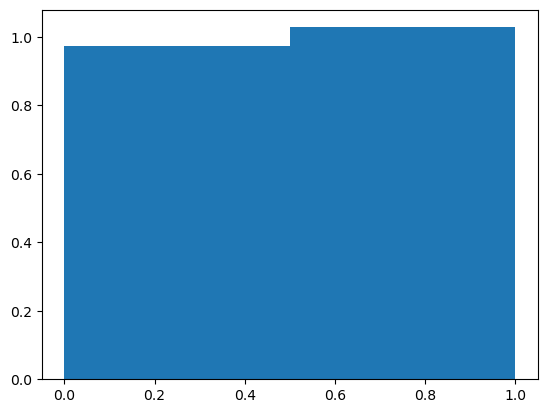

In [16]:
# If you want to get normalised histogram
hist_vals = plt.hist(coin_tosses, bins=2, density=True) 

Text(0, 0.5, 'Number of occurences')

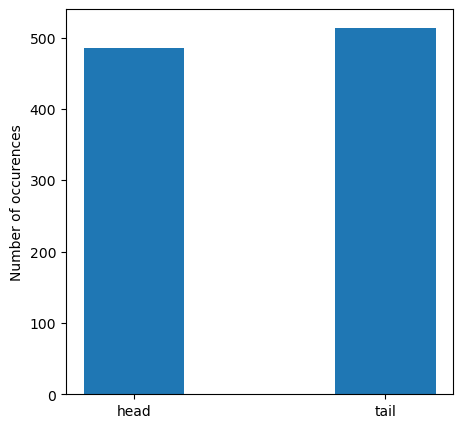

In [17]:
# To make a slightly nicer histogram 
f, ax = plt.subplots(figsize=(5,5))
hist_vals = ax.hist(coin_tosses, bins=2, align='mid', rwidth=0.4) # see the help of hist for details 
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['head', 'tail'])
ax.set_ylabel('Number of occurences')

In [18]:
# (4) Fix the seed of your random generator. Create an array `a` of 10 integers between 0 and 10. 
# Redo this operation and save it into an array `b`. Compare `a` and `b`. 
np.random.seed(10)
a = np.random.randint(5, size=4)
b = np.random.randint(5, size=4)
a, b 

(array([1, 4, 0, 1]), array([3, 4, 1, 0]))

In [19]:
np.random.seed?

Docstring:
seed(self, seed=None)

Reseed a legacy MT19937 BitGenerator

Notes
-----
This is a convenience, legacy function.

The best practice is to **not** reseed a BitGenerator, rather to
recreate a new one. This method is here for legacy reasons.
This example demonstrates best practice.

>>> from numpy.random import MT19937
>>> from numpy.random import RandomState, SeedSequence
>>> rs = RandomState(MT19937(SeedSequence(123456789)))
# Later, you want to restart the stream
>>> rs = RandomState(MT19937(SeedSequence(987654321)))
Type:      builtin_function_or_method


In [42]:
# The officially cleaner way to proceed (cf help of np.seed)
# This gives a different output because it initialise the random generator with a seedSequence. 
rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(10))) 
a = rs.randint(5, size=4)
b = rs.randint(5, size=4)
a, b 

(array([2, 2, 1, 3]), array([0, 4, 4, 1]))

In [43]:
rs = np.random.RandomState(10) 
a = rs.randint(5, size=4)
np.random.seed(10)
a_seed = np.random.randint(5, size=4)  # uses the convenience fonction which is shortcut for RandomState
a, a_seed

(array([1, 4, 0, 1]), array([1, 4, 0, 1]))

In [21]:
#How should you proceed to have 2 identical arrays ?  
# If we want a and b to be identical we need to reseed before each new operation
np.random.seed(10)
a = np.random.randint(5, size=4)
np.random.seed(10)
b = np.random.randint(5, size=4)
a, b 

(array([1, 4, 0, 1]), array([1, 4, 0, 1]))

### I.3 What is a conditional probability $p(A | B)$ and Bayes theorem? 

The conditional probability expresses the fact that the probability of an event can depend on another one. For example, you may wonder what is the probability to have a flu if you have fever. You would write it $p(\rm{flu} | \rm{fever}) $, which reads "p of flu GIVEN fever". $p(A \, | \, B) = \frac{p(A \, \cap \, B)}{p(B)}$ is the *fraction of times* $A$ occurs when $B$ occurs.

The Bayes theorem expresses formally how to calculate this conditional probability:
$$
p(A\,|\,B) = \frac{p(B\,|\,A) \, p(A)}{p(B)}
$$

The main thing you have to recall with conditional probability is that $p(A | B) \neq p( B | A)$: probability to have a flu given you have fever is different from probability you have fever given you have a flu. 

### I.4 Probability density function (PDF) and Cumulative Distribution Function (CDF) <a class="anchor" id="pdf"></a>

These concepts are essential for:
- Predicting probabilities of events.
- Modeling uncertainties in measurements.
- Designing experiments and interpreting data.

#### Probability density function - PDF 

The PDF describes the relative likelihood for a random variable to take a given value. 

Since we are dealing with probability *densities*, we have $p(x)\,\rm{d}x$ which is the probability of a value falling between $x$ and $x \,+\, {\rm{d}}x$.

Remember the histogram, counting your measurements (cf exercise on [coin toss](#Exercise:-Coin-toss)  above), setting the density to `True`. You have $\sum p(x) \delta x = 1$ (where $\delta x$ = bin width). This is a probability density function (effectively a probability mass function because you work with discrete variables).      

Probability densities are normalized such that the union of all possible events has a probability of unity; mathematically that criterion looks like this:

$$
\int p(x)\,{\rm{d}}x = 1
$$

If the concept of PDF was not aleady clear to you, check Section I.4 of the [expanded version](Basic-statistics_01_Expanded.ipynb) of this Notebook to look at the more formal definition of the pdf. 

**Examples:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  

- A *uniform* pdf is such that:

$$
\begin{array} \\ 
   h(x)    & = \frac{1}{b-a} \,\, {\rm{if}}\,a\,\leq\,x\,\leq\,b \\
   h(x)    & = 0 \,\,\, {\rm{otherwise} }  \\
\end{array}
$$

- The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf. 

- In cases where random variables are **discrete**, one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The *Poisson* or *Bernouilli* distribution are examples of pmf. 


#### Cumulative distribution function - CDF 

The CDF gives the probability that the variable is less than or equal to a value.

The **cumulative distribution function** is the *integral of a pdf*.

$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.

The CDF provides a direct way to calculate the probability for the value of a random variable $X$ to be between 2 values $x_1$ and $x_2$. If $x_1 < x_2$, then $P(x_1 < X < x_2) = H(x_2) - H(x_1)$. 

The *p% quantile* of a distribution, $q_p$, is defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution. By definition, the *interquartile range* contains 50% of the surface behind the CDF / PDF and hence 0.5 of the probability (centered on the median). We will see later how to use percentiles to calculate confidence intervals. 

#### Quantities describing a distribution

The moment of order k of a distribution are defined as follows:

$$
\mathbb{E}(x^k) = \, \int_{-\infty}^{+\infty} x^k\,h(x)\,{\rm d}x
$$

The first two central moments are the one that we commonly mention for characterising a distribution.
The central moment of order 1 is called the **mean**, **esperance** or **expectation value**. This is the related to the frequentist interpretation of an experiment: If you repeat an experiment an infinite number of times, this will be the mean value that you get. Intuitively, the mean is *the sum of all the outcomes weighted by their probability of occurence*, so the definition of the mean is quite intuitive:

$$
\mathbb{E}(x) \, = <x> \, = \, \int_{-\infty}^{+\infty} x\,h(x)\,{\rm d}x
$$

For example, by feeding the expression of the uniform pdf above, you can easily verify that its mean is $(b+a) / 2.$ 

The variance is the moment of order 2 **around the mean** (central moment) and tells you about the spread around the mean: 

$$
{\rm{Var}}(x) = \mathbb{E}[ (x - \mathbb{E}(x))^2] =  \mathbb{E}(x^2) - \mathbb{E}(x)^2 = \, \int_{-\infty}^{+\infty} (x-<x>)^2\,h(x)\,{\rm d}x
$$

For a uniform distribution, you may derive that ${\rm{Var}}(x) = (b-a)^2 / 12$

#### pdf and CDF in python 

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

**Method 1**

You work in two steps. It allows you to calculate multiple quantities associated to a distribution. 

- 1) **Create an instance of an object "distribution"** with some fixed parameters:    
e.g. 

``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

**Note:** The help of `scipy` distribution generally refers to the `loc` and `scale` keywords associated to the distribution. The `loc` corresponds to the `mean` (i.e. expectation value of order 1 central moment) and the `scale` corresponds to the `standard deviation`. 

In [22]:
g = scipy.stats.norm(0, 2)   
# More explicit call: g = scipy.stats.norm(loc=0, scale=2.)

- 2) Calculate **properties associated to (the instance of) this object** using a set of *specific methods*. For the pdf, use the method pdf: 

``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

**Method 2**

You can generate a `pdf` associated to a normal distribution with a single command line: 

``` python 
x = np.arange(-10,10,0.1) # Create an array over which you want to evaluate the pdf

y = scipy.stats.norm.pdf(x, loc=0, scale=2)   # for a gaussian of mean mu=0, sigma=2
```

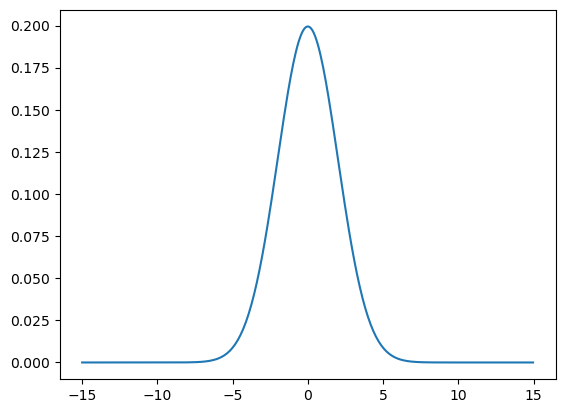

In [23]:
# Use this cell to plot the pdf associated with the gaussian distribution you have generated above
x = np.arange(-15, 15, 0.09)
g_pdf = g.pdf(x)
plt.plot(x, g_pdf)

Integral when step = 0.01 = 1.000 - But sum =99.994
Integral when step = 0.10 = 1.000 - But sum =9.999


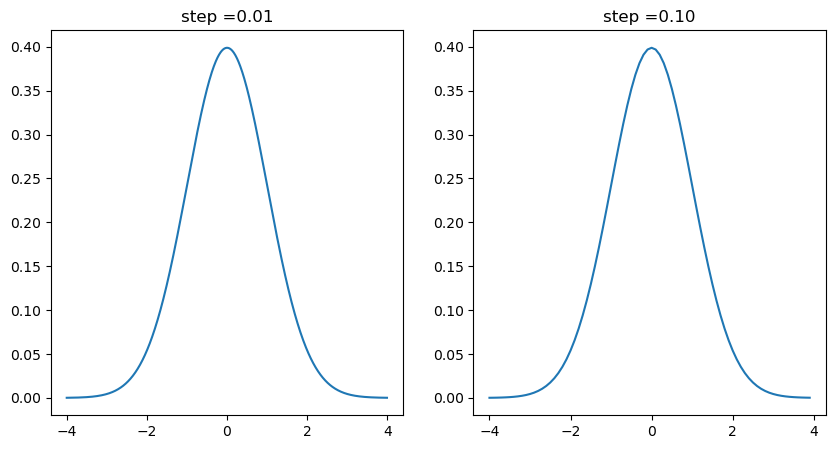

In [26]:
# The y axis does not depend on the way you sample your pdf but the sum does
f, ax = plt.subplots(ncols=2, figsize=(10,5))
for i, step in enumerate([0.01, 0.1]):
    n1d = scipy.stats.norm(0, 1)
    x = np.arange(-4,4, step)
    n1d_pdf = n1d.pdf(x)
    print('Integral when step = %.2f = %.3f - But sum =%.3f' %(step, np.sum(n1d_pdf * step), np.sum(n1d_pdf) ))
    ax[i].plot(x, n1d_pdf)
    ax[i].set_title('step =%.2f'%step)

Now, let's have a look at a Poisson distribution (probability mass function). Herebelow, we use $k$ to denote a discrete random variable notation.   

$$
\rm{Pois}(k\,|\,\mu) = \frac{\mu^k e^{-\mu}}{k!}
$$

**Parameters:** $\mu$ - Anticipated number of (random) events

Expectation: $\mu$

Standard Deviation: $\sqrt{\mu}$


(0, 20)

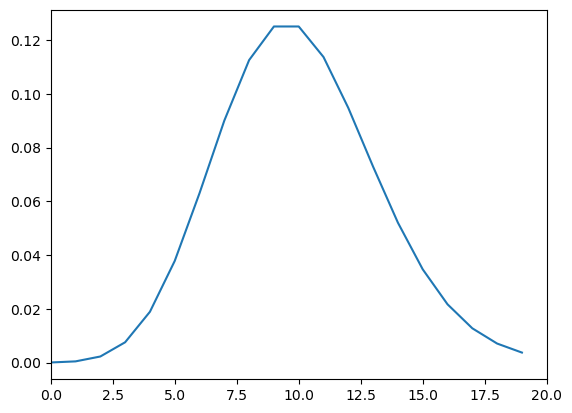

In [28]:
# Let's now do it for a probability mass function 
x = np.arange(0, 20, 1)
k = 10 
pois = scipy.stats.poisson(k)
pois_pmf = pois.pmf(x)
plt.plot(x, pois_pmf)
plt.xlim(0, 20)

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvs(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

In [21]:
sample_from_poisson = pois.rvs(100)
sample_from_poisson

array([10,  7,  7,  8,  9,  7,  7, 10,  8, 10, 11,  8, 13,  9,  9, 15,  6,
        6, 10, 10, 18, 13, 11,  9, 15,  7, 14,  8, 15, 12,  9, 13, 12, 10,
        8, 11,  9, 11, 19, 12, 15,  9, 12,  9,  8,  8, 11, 12,  8,  6,  9,
        6, 12,  9, 13, 11,  4, 10, 11, 11,  8, 14, 13,  7,  4, 14, 12,  9,
       14, 11,  7,  7,  8,  8, 13, 17,  3, 14,  5, 12, 16,  9,  8, 10, 18,
        5,  8, 14, 12,  7, 12, 13, 13,  7,  9, 17,  9, 17,  9, 10])

(0, 20)

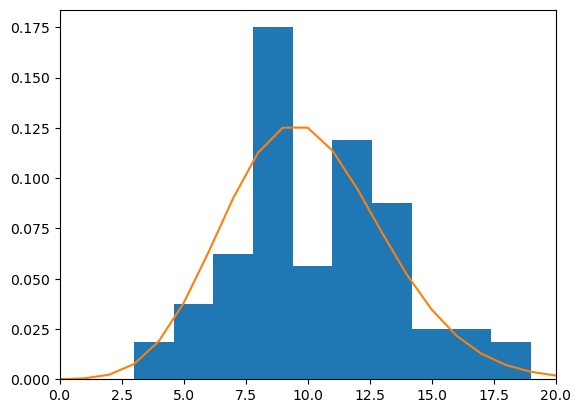

In [22]:
plt.hist(sample_from_poisson, density=True)
plt.plot(x, pois_pmf)
plt.xlim(0, 20)

#### Visualising the CDF

In the case of a gaussian PDF, the CDF $H(x_0) = p(X \leq x_0)$, is the area below the PDF between $-\infty$ and $x_0$.

The CDF provides a direct way to calculate the probability for the value of a random variable $X$ to be between 2 values $x_1$ and $x_2$. If $x_1 < x_2$, then $P(x_1 < X < x_2) = H(x_2) - H(x_1)$. On the above figure, this would be the difference of area up to $x_2$ minus the area up to $x_1$.   

Text(-1.6, 0.1, '$H(x_0) = p(X \\leq x_0)$')

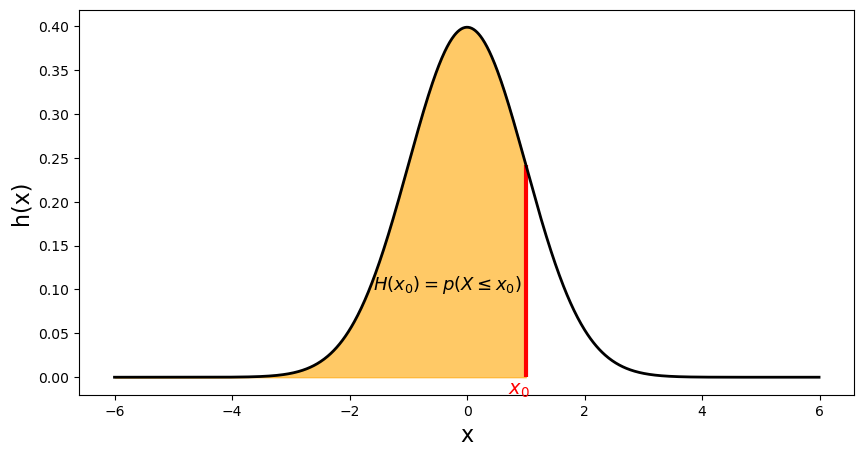

In [29]:
x = np.arange(-6,6,0.01)
x0 = 1.   # let's take x0 = 1 
id_x0 = np.searchsorted(x, x0)
g = scipy.stats.norm(loc=0, scale=1)
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
ax.plot(x, g.pdf(x), color='black', lw=2)
ax.vlines(x0, 0, g.pdf(x0), color='red', lw=3)
ax.fill_between(x[:id_x0], 0, g.pdf(x[:id_x0]), color='orange', alpha=0.6)
ax.set_ylabel('h(x)', size=16)
ax.set_xlabel('x', size=16)
ax.text(0.7, -0.02, r'$x_0$', size=14, color='red')
ax.text(-1.6, 0.1, r'$H(x_0) = p(X \leq x_0)$', size=13)

Text(0.5, 0, 'X')

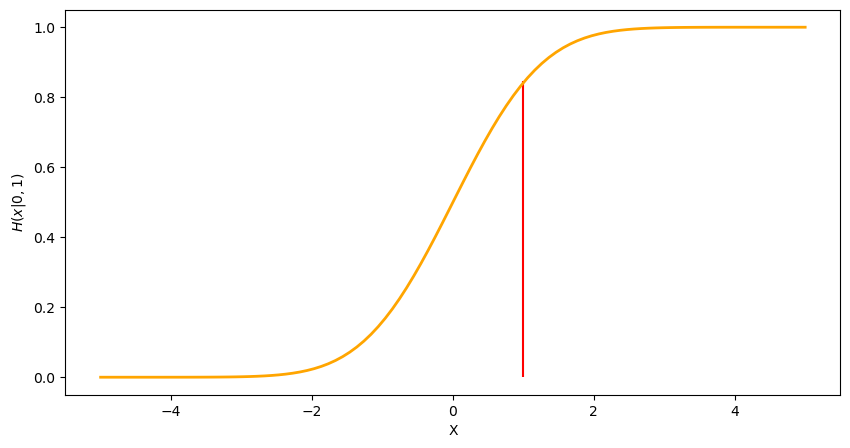

In [37]:
# CDF of a gaussian
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=2, color="orange")
ax.vlines(1, 0,0.845, color='red')
ax.set_ylabel("$H(x|0, 1)$")
ax.set_xlabel("X")

**Exercises:** 

- Generate a random sample of n points drawn from the gaussian distribution you defined above. (compare n=10, 100, 1000)
- Plot an histogram with the sample of points you have generated. 
- Plot a canonical gaussian pdf (width =1) and overplot an horizontal line showing its FWHM. 
- Print at the screen the value of the FWHM and compare the value you expect for a canonical 1D-gaussian (FWHM $= 2 * \sqrt{2 * \ln(2)} * \sigma $) 

TIP: Keep the expression of the FWHM of a Gaussian in mind, you may have to use it often. 

In [3]:
# Use this cell to generate a random sample of points drawn from the gaussian distribution you defined above
# let's take a canonical gaussian N(0,1)
g_canon = scipy.stats.norm(0, 1) 

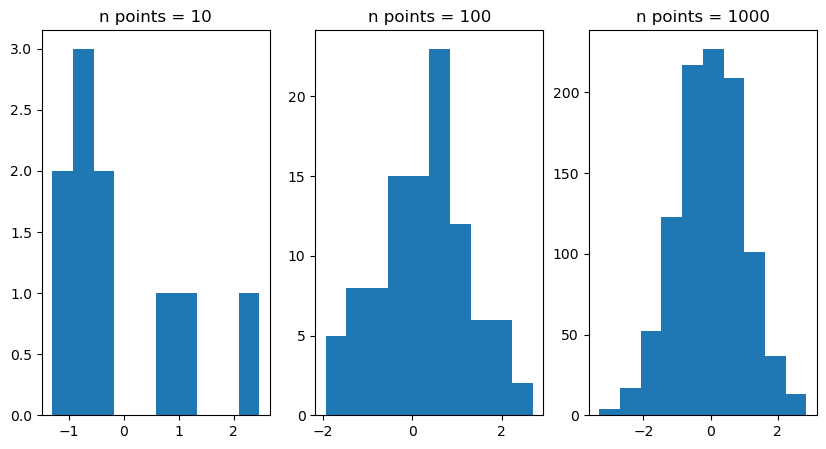

In [4]:
# ploting the histogram 
f, ax = plt.subplots(ncols=3, figsize=(10, 5))
for i, npts in enumerate([10, 100, 1000]):
    random_samples = g_canon.rvs(npts)
    ax[i].hist(random_samples)
    ax[i].set_title('n points = %i'%npts)

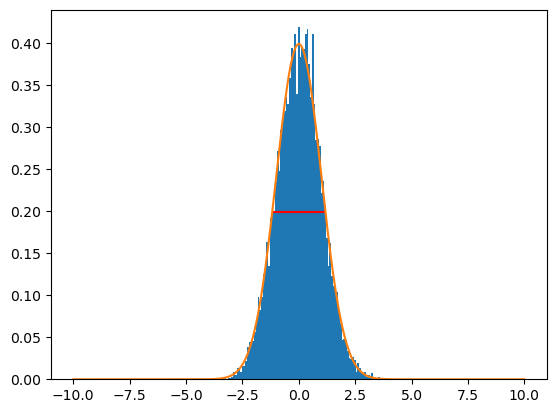

In [42]:
# Illustration of a canonical gaussian pdf and overplot of a line showing its FWHM 
x = np.arange(-10,10,0.01)
g_samp_10000 = g_canon.rvs(10000)
plt.hist(g_samp_10000, density = True, bins=100)
#plt.hist(g_samp_10000, bins=100)
plt.plot(x, g_canon.pdf(x))
# Overlay the fwhm 
sig_canon = 1
fwhm_vmin = 0 - np.sqrt(np.log(2.) *2) * sig_canon
fwhm_vmax = 0 + np.sqrt(np.log(2.) *2) * sig_canon
plt.hlines(g_canon.pdf(x).max()/2, fwhm_vmin, fwhm_vmax, color='red')

In [36]:
sig_draw = np.std(g_samp_10000)
print('Empirical FWHM: %.3f' %( 2. * np.sqrt( 2. * np.log(2.)) * sig_draw) )
print('Canonical FWHM %.3f '%( 2. * np.sqrt( 2. * np.log(2.))) )

Empirical FWHM: 2.353
Canonical FWHM 2.355 


In [37]:
## !! BEWARE 
print( 'Base 10 log of 2 = %.2f ' %np.log10(2), 'but natural log of 2, i.e. ln(2)=%.2f '%np.log(2.))

Base 10 log of 2 = 0.30  but natural log of 2, i.e. ln(2)=0.69 


In [5]:
#np.log10(2) != np.log(2)
print(np.log10(2), np.log(2))

0.3010299956639812 0.6931471805599453


You can also calculate various statistics associated to your function such as the mean, median, standard deviation, central moments, ...

In [6]:
# Let's take a canonical normal distribution with (mu, sigma) = (0,1)
n = scipy.stats.norm(0, 1)
print('Mean = %.2f  ' %n.mean() )
print('Median = %.2f  ' %n.median() )
print('Stdev = %.2f  ' %n.std() )
print('Central moment of order 4 = %.2f' %n.moment(4) )

Mean = 0.00  
Median = 0.00  
Stdev = 1.00  
Central moment of order 4 = 3.00


You can also calculate the $p$ percentile of a function or "percent point function" or ppf (i.e. the inverse of the cdf): `scipy.stats.distrib.ppf(q)` 

In [7]:
print('q_25 and q_75 are %.3f , %.3f' %(n.ppf(0.25), n.ppf(0.75)) )
print('The interquartile range is %.3f' % (n.ppf(0.75)- n.ppf(0.25)) )

q_25 and q_75 are -0.674 , 0.674
The interquartile range is 1.349


Let's visualise what is this inter-quartile range. *Look at the code and figure* to ensure that you understand the relation between `ppf`, `cdf` and `pdf`.

(0, 0.5)

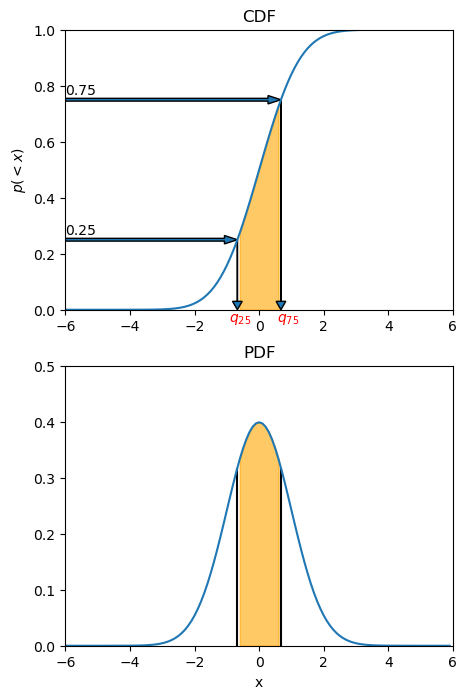

In [8]:
f, ax = plt.subplots(nrows=2, figsize=(5,8))
x = np.arange(-6,6,0.1)
ax[0].set_title('CDF')
ax[0].plot(x, n.cdf(x))

# The ppf is inverse of CDF => reads the function from y axis
# Draws 2 arrows from y=0.25 and y=0.75.  
# Definition of ax.arrow(): ax.arrow(x, y, dx, dy) 
ax[0].arrow(-6, 0.25, n.ppf(0.25)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].arrow(-6, 0.75, n.ppf(0.75)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].text(-6, 0.27, '0.25')
ax[0].text(-6, 0.77, '0.75')

# The ppf returns the x for which cdf(x = q_{25}) = 0.25 and  cdf(x = q_{75}) = 0.75 
q25, q75 = n.ppf(0.25), n.ppf(0.75)
id25, id75 = np.searchsorted(x, q25), np.searchsorted(x, q75)  
ax[0].arrow(n.ppf(0.25), 0.25, 0, -0.25, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].arrow(n.ppf(0.75), 0.75, 0, -0.75, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].text(0.54, -0.04, '$q_{75}$', color='red' )
ax[0].text(-0.94, -0.04, '$q_{25}$', color='red' )
ax[0].fill_between(x[id25:id75], n.cdf(x[id25:id75]), 0, color='orange', alpha=0.6)

ax[0].set_ylabel('$p(<x)$')

ax[1].plot(x, n.pdf(x))
ax[1].set_title('PDF')
ax[1].set_xlabel('x')

# Let's plot 2 vertical line and color the area corresponding to the interquartile 
ax[1].vlines(q25, 0, n.pdf(q25))
ax[1].vlines(q75, 0, n.pdf(q75))
ax[1].fill_between(x[id25:id75], n.pdf(x[id25:id75]), 0, color='orange', alpha=0.6)

qq = [ax[i].set_xlim(-6,6) for i in range(2)]
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,0.5)

The region delimited by the 2 vertical black lines on the bottom pannel corresponds to the interquartile range. The orange area covered in the pdf is 50% of the surface covered by the PDF, which means that 50% of the total probability is in that range. The $q_{25}, q_{50}, q_{75}$ quartiles divide the sample into 4 equally probable samples. There is 25% probability for a value $X$ to be $X < q_{25}$, or 25% probability for a value $X$ to be $X > q_{75}$. 

### I.4a Common Probability distributions

The concepts outlined above are part of the prerequisite for this course. A refresh of the characteristics of PDF, and examples of common PDFs is provided below. 

- To review the **properties of probability distribution functions** (mean, standard deviation, variance, skewness, ...), go to the notebook [Descriptive_statistics_01.ipynb](Descriptive_statistics_01.ipynb).    

- To do an interactive tour of the characteristics and properties of **common distributions** encountered in science, you may run the Notebook [Descriptive_statistics_02.ipynb](Descriptive_statistics_02.ipynb). 

### I.4b Bivariate density function:  <a class="anchor" id="bivariate"></a>

One dimensional distribution function (discussed so far) describe the distribution of N random variables $x_i$. One can similarly define two-dimensional distribution of two *continuous random variables* $x, y$, i.e. $h(x, y)$ such that  $\int_{-\infty}^{+\infty} \,{\rm d}x \int_{-\infty}^{+\infty} h(x, y) \, {\rm d}y$ = 1. This distribution should be interpreted as giving the probability that $x$ is between $x$ and $x + {\rm{d}}x$ *and* that $y$ and $y + {\rm{d}}y$ (remember the definition of the intersection between 2 ensembles during the previous lecture).

Such a distribution of 2 random variable is called a **bivariate distribution**. 

In analogy to the 1D PDF, the variances on $x$ and $y$ are defined as:

$$
{\rm{Var}}(x) \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} (x-<x>)^2\,h(x, y)\,{\rm d}x {\rm d}y  
$$
$$
{\rm{Var}}(y) \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} (y-<y>)^2\,h(x, y)\,{\rm d}x {\rm d}y
$$
where the mean values are defined as 
$$
<x> =  \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} x\,h(x, y)\,{\rm d}x {\rm d}y
$$
$$
<y> =  \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} y\,h(x, y)\,{\rm d}x {\rm d}y
$$

Finally, one also defines the covariance of $x$ and $y$ as:

$$
{\rm{Cov}}(x, y) \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} (x \,-\, <x>) \, (y \,-\, <y>) \,h(x, y)\,{\rm d}x {\rm d}y
$$

This measures the dependance between the 2 variables $x$ and $y$. The covariance is equal to 0 when the 2 variables are uncorrelated. 

The *marginal distribution* $m(x)$ (resp $m(y)$) is obtained by integrating $h(x, y)$ over all the values of $y$ (resp $x$): 

$$
m(x) = \int h(x,y) \, {\rm d}y 
$$

This marginal distribution is different from the distribution $h^{\prime}(x, y=y_0)$. The marginal distribution is generally wider. In addition, only $m(x)$ is properly normalised. We'll see better the difference on the example below. 

#### Example: bivariate normal density function

Use of `scipy.stats.multivariate_normal()` for a multivariate **gaussian** distribution. 

The expression of the bivariate gaussian distribution is:

$$
h(x, y | \mu_x, \mu_y, \sigma_x, \sigma_y, \sigma_{xy}) = \frac{1}{2 \, \pi \, \sigma_x \sigma_y \sqrt{1 - \rho^2}} \, \exp\left(\frac{-z^2}{2(1-\rho^2)}\right)
$$

where
$$
z^2 = \frac{(x-\mu_x)^2}{\sigma^2_x} + \frac{(y-\mu_y)^2}{\sigma^2_y} - 2 \, \rho \, \frac{(x-\mu_x)\,(y-\mu_y)}{\sigma_x\,\sigma_y}
$$

and the dimensionlenss correlation coefficient between $x$ and $y$ is:
$$
\rho = \frac{\sigma_{xy}}{\sigma_x\,\sigma_y}
$$

The contours of the bivariate distribution are inclined by an angle $\alpha$ (defined for $-\pi/2 < \alpha < \pi/2$) between the x-axis and ellipse major axis. Its value is given by: 
$$
\rm{tg}({2\,\alpha}) = 2\,\rho \frac{\sigma_x \sigma_y}{\sigma_x^2 - \sigma_y^2} = 2\,\frac{\sigma_{xy}}{\sigma_x^2 - \sigma_y^2}
$$

One can show (see [below](#I.4c-Multivariate-normal-distribution)) that the variance of the marginal distribution $m(x)$ is $\sigma_{x}^2 \equiv {\rm{Vax(x)}}$, and similarly the variance of $m(y)$ is $\sigma_{y}^2 \equiv {\rm{Vax(y)}}$

rho = sigma_xy / (sigma_x * sigma_y) = 0.30


Text(0.5, 1.0, '$h(x, y =0.50 )$')

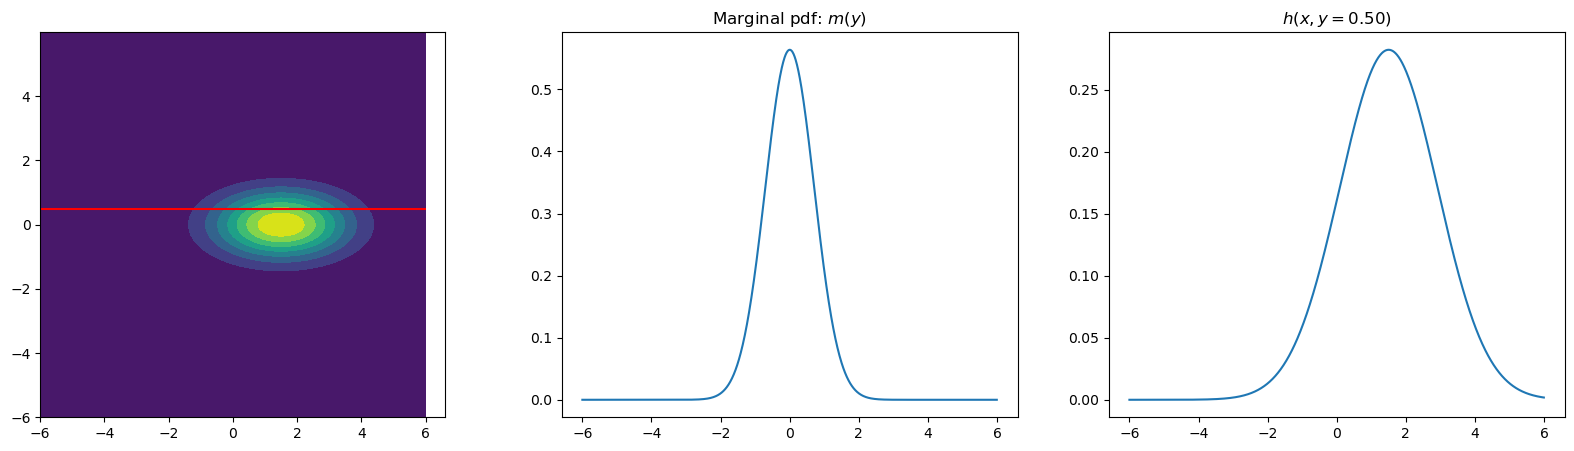

In [12]:
step = 0.01
x, y = np.arange(-6.,6.,step), np.arange(-6,6.,step)
X, Y = np.meshgrid(x,y)
# X, Y = np.mgrid[-6:6:.01, -6:6:.01]    # Alternative command to generate a meshgrid!
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Non isotropic bivariate normal distribution
# Warning: we give elements of the covariance matrix! 
# rho = 0.3
#cov_mtx = np.array([[2.0, 0.3], [0.3, 0.5]])
#rho = cov_mtx[0,1] / (cov_mtx[0,0] * cov_mtx[1,1])

# rho = 0
cov_mtx = np.array([[2.0, 0.0], [0.0, 0.5]])#rho = cov_mtx[0,1] / (cov_mtx[0,0] * cov_mtx[1,1])

print('rho = sigma_xy / (sigma_x * sigma_y) = %.2f' %rho)
n_2d = scipy.stats.multivariate_normal(mean=np.array([1.5, 0.]), cov=cov_mtx)
f, ax = plt.subplots(figsize=(20,5), ncols=3)
ax[0].contourf(X, Y, n_2d.pdf(pos))
ax[0].set_aspect('equal')  # same unit length along x and y 

# Calculates the marginal pdf
ax[1].plot(y, n_2d.pdf(pos).sum(axis=1) * step )   # I sum over the x axis 
ax[1].set_title('Marginal pdf: $m(y)$')

# Plot h(y, x=xval) where xval = 1 
# define xid: index of xarray for which I want to know the conditional pdf h(y, x=xid)
#xid = 800
#ax[0].vlines(x[xid]-step/2., -6, 6, color='red')
#ax[2].plot(y, n_2d.pdf(pos)[:, xid]   / (n_2d.pdf(pos).sum(axis=0)[xid] * step)) # Note the renormalisation by p(x) at x=xid
#ax[2].set_title('$h(y, x =%.2f )$'%x[xid])

# Plot h(x, y=yval) where yval = 0.5
yid = 650   # y = 0.5
ax[0].hlines(y[yid]-step/2., -6, 6, color='red')
ax[2].plot(x, n_2d.pdf(pos)[yid, :]   / (n_2d.pdf(pos).sum(axis=1)[yid] * step) ) # Note the renormalisation by p(y) at y=yid
ax[2].set_title('$h(x, y =%.2f )$'%y[yid])

Text(0.5, 1.0, '$h(x, y =0.50 )$')

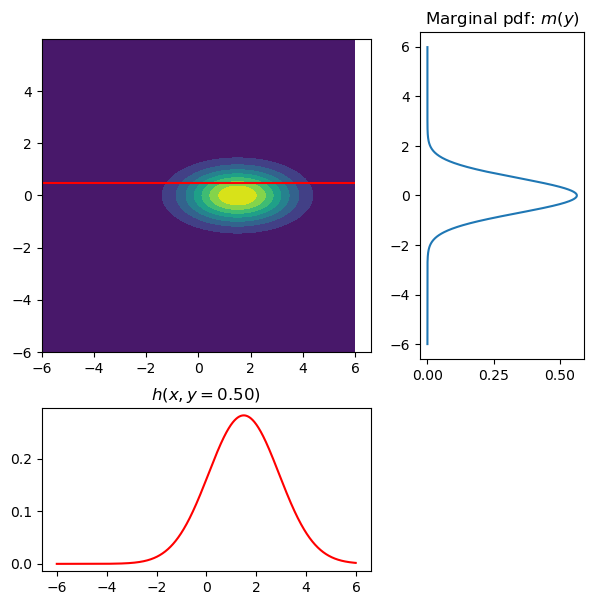

In [13]:
# A nicer visualisation 
fig = plt.figure(figsize=(7, 7))
ax = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])

ax0 = plt.subplot(ax[0])
col_ax0 = ax0.contourf(X, Y, n_2d.pdf(pos))
ax0.set_aspect('equal')  # same unit length along x and y 
ax0.hlines(y[yid]-step/2., -6, 6, color='red')

# plot the marginal pdf
ax1 = plt.subplot(ax[1])
ax1.plot(n_2d.pdf(pos).sum(axis=1) * step, y)   # I sum over the x axis  ; I inverse x and y for plotting
ax1.set_title('Marginal pdf: $m(y)$')

# Plot h(x, y=yval) where yval = 0.5
yid = 650   # y = 0.5
ax2 = plt.subplot(ax[2])
ax2.plot(x, n_2d.pdf(pos)[yid, :]   / (n_2d.pdf(pos).sum(axis=1)[yid] * step), color='red') # Note the renormalisation by p(y) at y=yid
ax2.set_title('$h(x, y =%.2f )$'%y[yid])

# Plot colorbar in axis3  - does not display too nicely
#ax3 = plt.subplot(ax[3])
#ax3.set_visible(False)  # clear the axis 
#cbar = fig.colorbar(col_ax0, )
#cbar.ax.set_ylabel('density: $h(x, xy)$', fontsize=13)

### I.4c Multivariate normal distribution 

[**This is supplementary material**] In fact, one can generalise the bivariate normal distribution (or gaussian distribution: we use both names) to $n$ dimension. A multivariate normal distribution represents a distribution of a multivariate RV that is made up of multiple RV that can be correlated with each other. This multivariate normal distribution is best writen using matrix formalism. It is characterised by the mean vector $\mathbf{\mu}$, which is the expected value of the distribution; and the covariance matrix $\Sigma$, which measures how dependent random variables are and how they change together. 
 
The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$
 
Where $\mathbf{z}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the symmetric and positive definite covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its determinant. We denote this multivariate normal distribution as: 

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

The the distribution is a multivariate gaussian, the marginal and conditional distributions are also gaussian. 

In the case of a 2D multivariate normal distribution, we have: 
$$
\begin{bmatrix}
\mathbf{x_1} \\
\mathbf{x_2} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\mathbf{x_1}} \\
\mu_{\mathbf{x_2}}
\end{bmatrix},
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{12}^T & \Sigma_{22}
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma)
, \qquad 
\Sigma^{-1} = \Lambda = 
\begin{bmatrix}
\tilde{\Sigma_{11}} & \tilde{\Sigma_{12}} \\
\tilde{\Sigma_{12}}^T & \tilde{\Sigma_{22}}
\end{bmatrix}
$$

The marginal distributions of each component $\mathbf{x}$ and $\mathbf{y}$ are defined as: 

$$
\begin{split}
p(\mathbf{x_1}) & = \mathcal{N}(\mu_{\mathbf{x_1}}, \Sigma_{11}) \\
p(\mathbf{x_2}) & = \mathcal{N}(\mu_{\mathbf{x_2}}, \Sigma_{22})
\end{split}
$$


In [14]:
# We can check this out using the same example as above, using linear algebra capabilities of numpy
d = 2  # dimensions
mean = np.matrix([[1.5], [0]])  # vector with (0, 0.5) as a column   
cov = np.matrix([ 
    [2.0, 0.3], 
    [0.3, 0.5]
])

# Get the mean values from the vector
mean_x1 = mean[0,0]
mean_x2 = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
sigma_11 = cov[0, 0]
sigma_22 = cov[1, 1]
sigma_12 = cov[0, 1]  # = sigma_12 transposed in this case

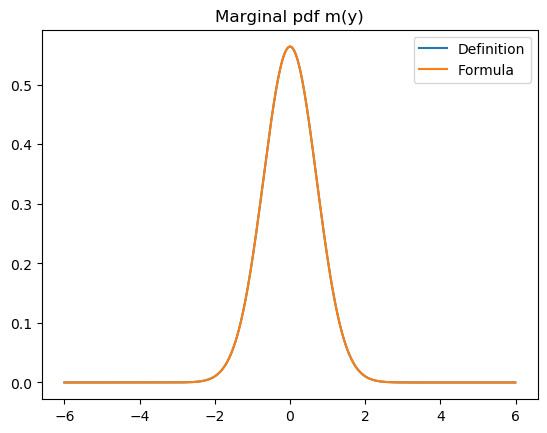

In [55]:
# marginal pdf m(y) -here y is equivalent to x2
# Numerical estimate 
plt.plot(y, n_2d.pdf(pos).sum(axis=1) * step, label='Definition')

# "theory" pdf 
# /!\ Beware: if using scipy.stats.norm(): the second argument is the std 
# For multivariate we have the cov matrix whose diagonal elements are the var = std**2 
#py_marginal_1d = scipy.stats.norm(mean_x2, np.sqrt(sigma_22))
# plt.plot(y, py_marginal_1d.pdf(y))

py_marginal = scipy.stats.multivariate_normal(mean_x2, sigma_22)
plt.plot(y, py_marginal.pdf(y), label='Formula')
plt.title("Marginal pdf m(y)")
plt.legend()


The **conditional distribution** of $\mathbf{x_1}$ given $\mathbf{x_2}$ is defined as: 

$$
p(\mathbf{x_1} \mid \mathbf{x_2}) = \mathcal{N}(\mu_{x_1|x_2}, \Sigma_{x_1|x_2})
$$

With mean:

$$
\mu_{x_1|x_2} = \mu_{x1} - \Sigma_{12} \Sigma_{22}^{-1} \left(x_2 -\mu_{x2}\right)
$$

and covariance matrix

$$
\Sigma_{x1|x2} = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
$$


with $\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$ being the [Schur complement](https://en.wikipedia.org/wiki/Schur_complement) of $\Sigma_{22}$ (note that in that expression, we have also made use of $\Sigma^T_{12} = \Sigma_{21}$). 

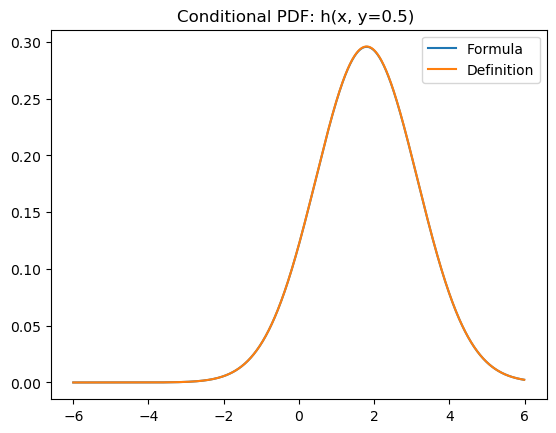

In [56]:
# Calculate h(x|y=0.5)
# Calculation through proper algebra
y_condition = 0.5  # To condition on y = 0.5
mean_xgiveny = mean_x1 + (sigma_12 * (1/sigma_22) * (y_condition - mean_x2))
cov_xgiveny = sigma_11 - sigma_12 * (1/sigma_22) * sigma_12

# Numerical estimate
px_giveny = scipy.stats.multivariate_normal(mean_xgiveny , cov_xgiveny)
plt.plot(x, px_giveny.pdf(x), label='Formula')  # y=0.5

plt.plot(x, n_2d.pdf(pos)[yid, :] / (n_2d.pdf(pos).sum(axis=1)[yid] * step ), label='Definition') # Note the renormalisation by p(y) at y=yid
plt.title("Conditional PDF: h(x, y=0.5) ")
plt.legend()

#### Supplementary exercise: 

- Check that the conditional and marginal distribution are effectively pdf, namely that their integral equals 1. 
- Calculate p(y | x=1.0) 

## Summary 

We have reviewed basic statistical concepts and quantities, and how to use them in python. In particular: 
- basic probability concepts: a sample, an event, a realisation, a conditional probability (i.e. $p(A|B)$ is probability of $A$ given $B$). 
- the probability combination rules. 
- what is a **random variable** (this is a key concept!), and how to generate and manipulate random variable with numpy: `np.random.rand()`, `np.random.seed(value)`, `np.random.RandomState(value)`, `np.random.randint()`, `np.random.permutation()`
- Probability density function (pdf) and Cumulative density function (CDF) (You *need* to understand what are these functions very well !)
- How to manipulate distributions with `scipy.stats`. For example, to work with a gaussian, and subsequently calculate pdf, cdf, ... drawn from a gaussian distribution, : `g = scipy.stats.norm()` followed by `g.pdf(x)` to get a pdf sampled for values x (single value or array), `g.cdf(x)` for the cdf(), ...
- Bivariate PDF, marginal distribution and multivariate distributions
- The expression of a multivariate normal distribution: beware of the defintion of the univariate and multivariate normal distrib. in scipy: use of the std in `scipy.stats.norm(mu, sig)` but of the covariance in `scipy.stats.multivariate_normal(mu, cov)`


## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2, 3.5) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* Youtube video about Random variable and PDF: https://www.youtube.com/watch?v=9KVR1hJ8SxI : First 7 minutes
* Youtube video about CDF and its link to PDF: https://www.youtube.com/watch?v=4BswLMKgXzU : First 6 minutes

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/) and personal notes from "Telmo Correa" here https://github.com/telmo-correa/all-of-statistics/tree/master.  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

